In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error, make_scorer

In [104]:
# Define root squere Root-mean-square error : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

In [228]:
df= pd.read_csv('../tp1/data_filled_ready_to_train.csv',encoding='UTF-8')

columns = ['created_on','property_type','lat','lon','surface_total_in_m2','surface_covered_in_m2','floor','rooms','expenses']

train = df.loc[:,columns]
y =df.price_aprox_usd


In [106]:
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)

print 'X_train:',X_train.shape
print 'y_train:',y_train.shape

print 'X_test:',X_test.shape
print 'y_test:',y_test.shape

X_train: (55059, 9)
y_train: (55059,)
X_test: (23598, 9)
y_test: (23598,)


# sin estandarizar

In [110]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

('RMSE on Training set :', 185026.25156698766)
('RMSE on Test set :', 172505.44589686877)


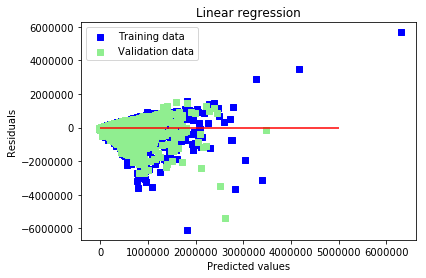

In [111]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from pandas import Series
%matplotlib inline

# Plot residuals


plt.scatter((y_train_pred), (y_train_pred - y_train), c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 5000000, color = "red")


plt.show()

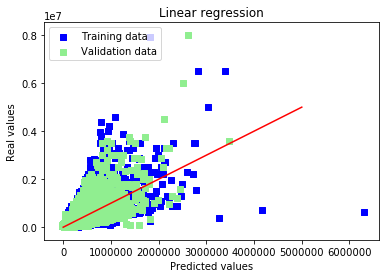

In [112]:
# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 5000000], [0, 5000000], c = "red")
plt.show()

# ESTANDARIZANDO

('RMSE on Training set :', 75450.067157793674)
('RMSE on Test set :', 64278.524766464157)


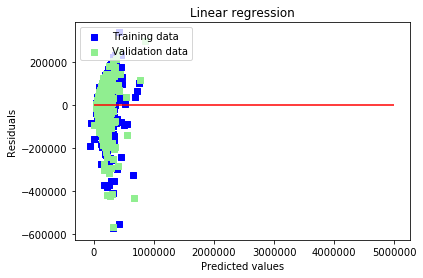

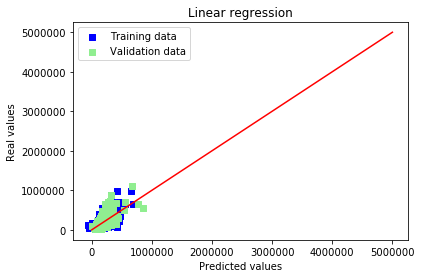

numpy.ndarray

In [206]:
# Linear Regression
lr = LinearRegression()

scaler = StandardScaler()
X_train =scaler.fit_transform(X_train)
X_test =scaler.fit_transform(X_test)

lr.fit(X_train, y_train)

# Look at predictions on training and validation set
print("RMSE on Training set :", rmse_cv_train(lr).mean())
print("RMSE on Test set :", rmse_cv_test(lr).mean())
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

plt.scatter((y_train_pred), (y_train_pred - y_train), c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 5000000, color = "red")


plt.show()

# Plot predictions
plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 5000000], [0, 5000000], c = "red")
plt.show()

type(y_train_pred)

('Best alpha :', 0.001)
Try again for more precision with alphas centered around 0.001
('Best alpha :', 0.00059999999999999995)
('Ridge RMSE on Training set :', 185026.25156975896)
('Ridge RMSE on Test set :', 172505.44586981233)


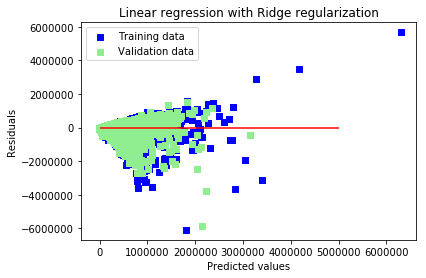

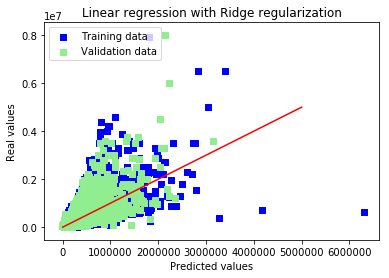

Ridge picked 9 features and eliminated the other 0 features


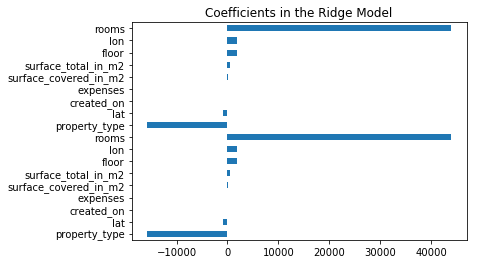

In [87]:
# 2* Ridge
ridge = RidgeCV(alphas = [0.001, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 5000000, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 5000000], [0, 5000000], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()


In [294]:
def analize_regrssion(dataframe, columns, valor):
    train = dataframe.loc[:,columns]
    y =dataframe.price_aprox_usd

    X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)

    print 'X_train:',X_train.shape
    print 'y_train:',y_train.shape

    print 'X_test:',X_test.shape
    print 'y_test:',y_test.shape

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    # Look at predictions on training and validation set
    print("RMSE on Training set :", rmse_cv_train(lr).mean())
    print("RMSE on Test set :", rmse_cv_test(lr).mean())
   

    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    
    plot_linear_regression(y_train,y_train_pred,y_test,y_test_pred, valor)



def plot_linear_regression(y_train,y_train_pred,y_test,y_test_pred, valor):
    plt.scatter((y_train_pred), (y_train_pred - y_train), c = "blue", marker = "s", label = "Training data")
    plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
    plt.title("Linear regression")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc = "upper left")
    plt.axis('equal')
    plt.hlines(y = 0, xmin = 0, xmax = valor, color = "red")
    plt.show()

    # Plot predictions
    plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
    plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
    plt.title("Linear regression")
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.axis('equal')
    plt.legend(loc = "upper left")
    plt.plot([0, valor], [0, valor], c = "red")
    plt.show()
    

# Por tipo de propiedad

X_train: (31645, 9)
y_train: (31645, 1)
X_test: (13563, 9)
y_test: (13563, 1)
X_train: (18473, 9)
y_train: (18473, 1)
X_test: (7918, 9)
y_test: (7918, 1)
X_train: (3607, 9)
y_train: (3607, 1)
X_test: (1546, 9)
y_test: (1546, 1)


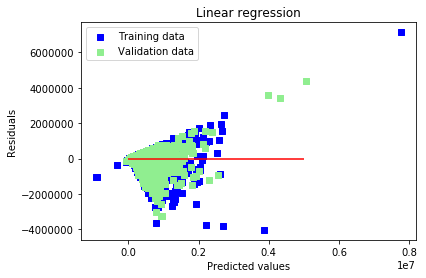

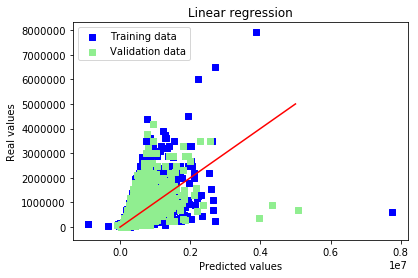

In [217]:
y_train_total = np.array([])
y_train_pred_total =np.array([])
y_test_total = np.array([])
y_test_pred_total = np.array([])

for i in range(1,4): 
    
    train = df.loc[df.property_type == i,columns]
    y =df.loc[df.property_type == i,['price_aprox_usd']]

    X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)

    print 'X_train:',X_train.shape
    print 'y_train:',y_train.shape

    print 'X_test:',X_test.shape
    print 'y_test:',y_test.shape
    

    y_train_total  = np.append(y_train_total,y_train)
    y_test_total  = np.append(y_test_total,y_test)
    
    

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    
    y_train_pred_total  =np.append(y_train_pred_total,y_train_pred)
    y_test_pred_total  = np.append(y_test_pred_total,y_test_pred)
    
    
plot_linear_regression(y_train_total,y_train_pred_total,y_test_total,y_test_pred_total,5000000)

X_train: (31645, 9)
y_train: (31645,)
X_test: (13563, 9)
y_test: (13563,)
('RMSE on Training set :', 67806.841873528261)
('RMSE on Test set :', 78553.631047043324)


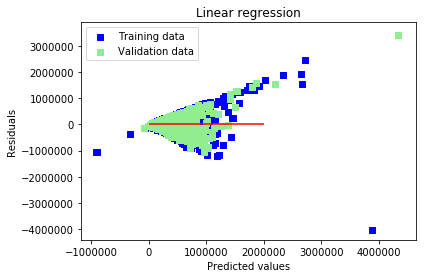

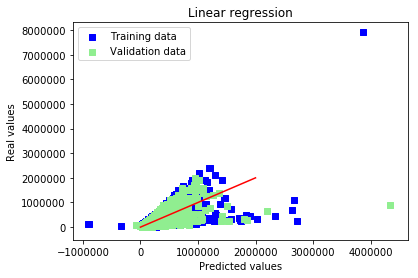

In [196]:
columns = ['created_on','property_type','lat','lon','surface_total_in_m2','surface_covered_in_m2','floor','rooms','expenses']
df_appartment = df.loc[df.property_type == 1,:]
analize_regrssion(df_appartment, columns,2000000)


X_train: (18473, 9)
y_train: (18473,)
X_test: (7918, 9)
y_test: (7918,)
('RMSE on Training set :', 67806.841873528261)
('RMSE on Test set :', 78553.631047043324)


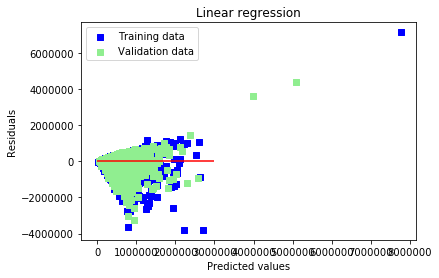

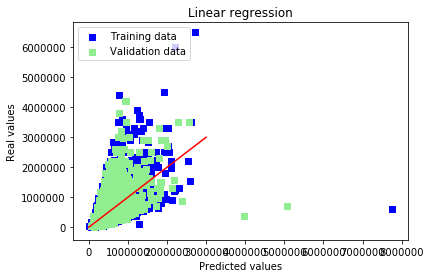

In [197]:
df_house = df.loc[df.property_type == 2,:]
analize_regrssion(df_house, columns,3000000)

X_train: (3607, 9)
y_train: (3607,)
X_test: (1546, 9)
y_test: (1546,)
('RMSE on Training set :', 2.5327713244539002e-08)
('RMSE on Test set :', 2.2740541785230255e-08)


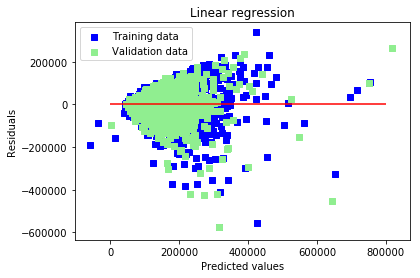

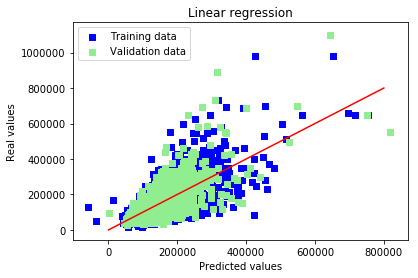

In [150]:
df_ph = df.loc[df.property_type == 3,:]
analize_regrssion(df_ph, columns,800000)

X_train: (3607, 9)
y_train: (3607,)
X_test: (1546, 9)
y_test: (1546,)
('RMSE on Training set :', 2.5327713244539002e-08)
('RMSE on Test set :', 2.2740541785230255e-08)


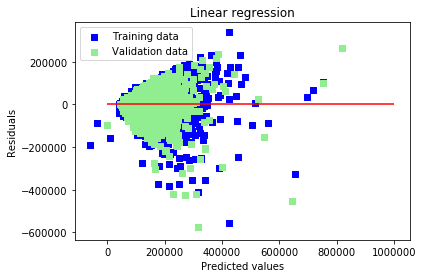

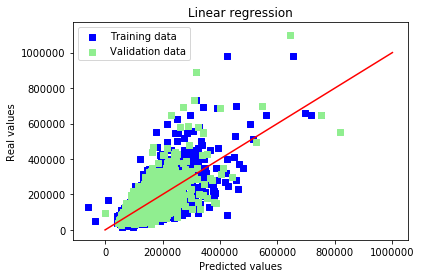

In [151]:
df_store = df.loc[df.property_type == 3,:]
analize_regrssion(df_store, columns,1000000)

# REGRESION LINEAL POR ZONA

X_train: (20571, 9)
y_train: (20571, 1)
X_test: (8817, 9)
y_test: (8817, 1)
X_train: (6402, 9)
y_train: (6402, 1)
X_test: (2744, 9)
y_test: (2744, 1)
X_train: (4055, 9)
y_train: (4055, 1)
X_test: (1738, 9)
y_test: (1738, 1)
X_train: (24031, 9)
y_train: (24031, 1)
X_test: (10299, 9)
y_test: (10299, 1)


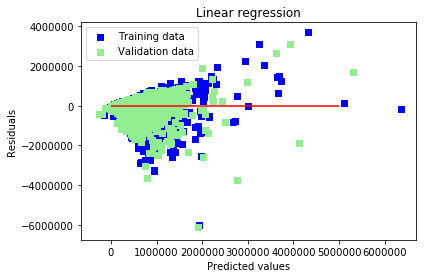

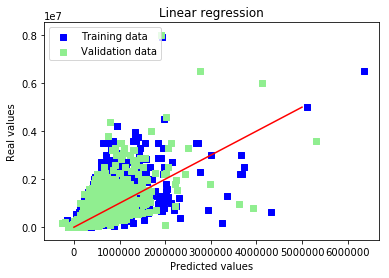

In [218]:
y_train_total = np.array([])
y_train_pred_total =np.array([])
y_test_total = np.array([])
y_test_pred_total = np.array([])

for i in range(0,4): 
    
    train = df.loc[df.state_name == i,columns]
    y =df.loc[df.state_name == i,['price_aprox_usd']]

    X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)

    print 'X_train:',X_train.shape
    print 'y_train:',y_train.shape

    print 'X_test:',X_test.shape
    print 'y_test:',y_test.shape
    

    y_train_total  = np.append(y_train_total,y_train)
    y_test_total  = np.append(y_test_total,y_test)
    
    

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    
    y_train_pred_total  =np.append(y_train_pred_total,y_train_pred)
    y_test_pred_total  = np.append(y_test_pred_total,y_test_pred)
    
    
plot_linear_regression(y_train_total,y_train_pred_total,y_test_total,y_test_pred_total,5000000)

X_train: (24031, 9)
y_train: (24031,)
X_test: (10299, 9)
y_test: (10299,)
('RMSE on Training set :', 2.5327713244539002e-08)
('RMSE on Test set :', 2.2740541785230255e-08)


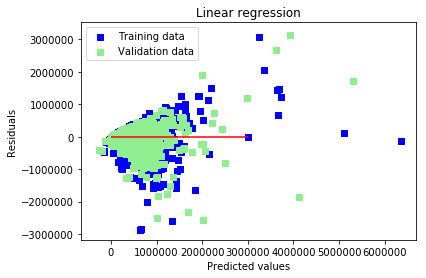

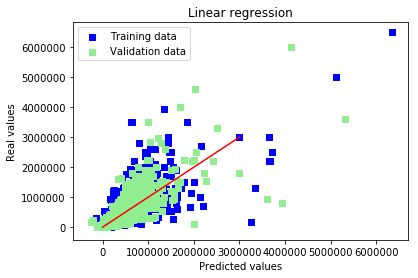

In [155]:
df_capfed = df.loc[df.state_name== 3,:]
analize_regrssion(df_capfed, columns,3000000)

# por zona y tipo de propiedad

X_train: (19711, 9)
y_train: (19711,)
X_test: (8448, 9)
y_test: (8448,)
('RMSE on Training set :', 67806.841873528261)
('RMSE on Test set :', 78553.631047043324)


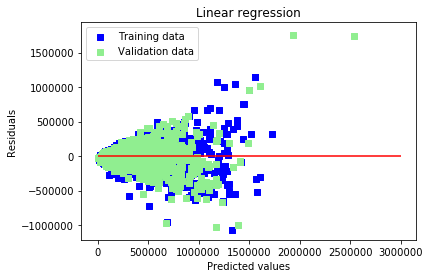

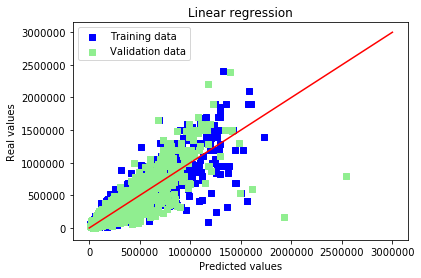

In [181]:
df_capfed = df.loc[df.state_name== 3,:]
df_capfed_depto = df_capfed.loc[df_capfed.property_type == 1,:]
analize_regrssion(df_capfed_depto, columns,3000000)

In [255]:

zone = df.state_name.drop_duplicates(keep='first')
typee = df.property_type.drop_duplicates(keep='first')
for z in zone:
    df_zone = df.loc[df.state_name == z,:]
    for t in typee
    property_type
    print df_zone.columns.values

[u'created_on' u'property_type' u'lat' u'lon' u'place_name' u'state_name'
 u'surface_total_in_m2' u'surface_covered_in_m2' u'description' u'floor'
 u'rooms' u'expenses' u'price_aprox_usd' u'price_usd_per_m2']
[u'created_on' u'property_type' u'lat' u'lon' u'place_name' u'state_name'
 u'surface_total_in_m2' u'surface_covered_in_m2' u'description' u'floor'
 u'rooms' u'expenses' u'price_aprox_usd' u'price_usd_per_m2']
[u'created_on' u'property_type' u'lat' u'lon' u'place_name' u'state_name'
 u'surface_total_in_m2' u'surface_covered_in_m2' u'description' u'floor'
 u'rooms' u'expenses' u'price_aprox_usd' u'price_usd_per_m2']
[u'created_on' u'property_type' u'lat' u'lon' u'place_name' u'state_name'
 u'surface_total_in_m2' u'surface_covered_in_m2' u'description' u'floor'
 u'rooms' u'expenses' u'price_aprox_usd' u'price_usd_per_m2']


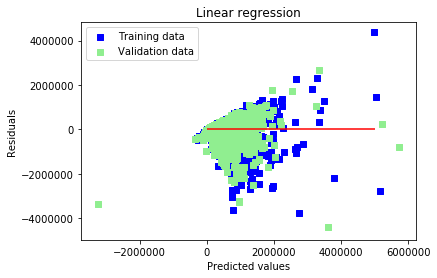

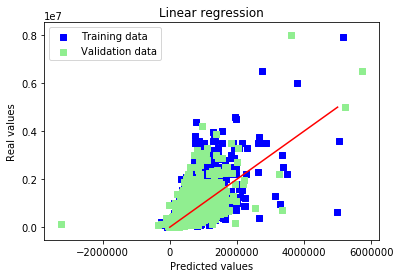

In [258]:
y_train_total = np.array([])
y_train_pred_total =np.array([])
y_test_total = np.array([])
y_test_pred_total = np.array([])

zone = df.state_name.drop_duplicates(keep='first')
typee = df.property_type.drop_duplicates(keep='first')

for z in zone:
    df_zone = df.loc[df.state_name == z,:]
    for t in typee:
        dff = df_zone.loc[df_zone.property_type == t,:]
        train = dff.loc[:,columns]
        y =dff.loc[:,['price_aprox_usd']]

        X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)
    
        if(X_train.shape[0] == 0 or X_test.shape[0] == 0 ):
            continue
    

        y_train_total  = np.append(y_train_total,y_train)
        y_test_total  = np.append(y_test_total,y_test)
    
    

        lr = LinearRegression()
        lr.fit(X_train, y_train)

        y_train_pred = lr.predict(X_train)
        y_test_pred = lr.predict(X_test)
    
        y_train_pred_total  =np.append(y_train_pred_total,y_train_pred)
        y_test_pred_total  = np.append(y_test_pred_total,y_test_pred)
    
    
plot_linear_regression(y_train_total,y_train_pred_total,y_test_total,y_test_pred_total,5000000)

# por barrio 

X_train: (18, 9)
y_train: (18,)
X_test: (8, 9)
y_test: (8,)
('RMSE on Training set :', 2.5327713244539002e-08)
('RMSE on Test set :', 2.2740541785230255e-08)


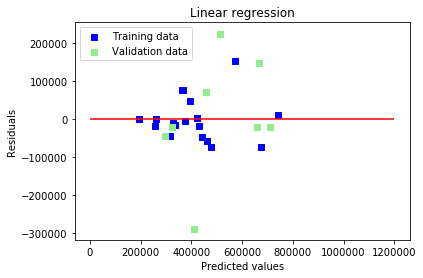

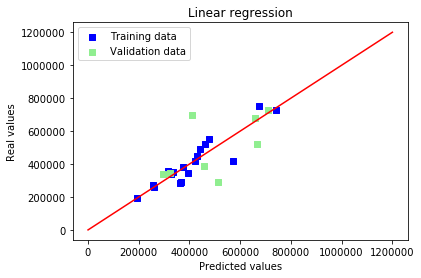

In [166]:
df_barrio = df.loc[df.place_name== 120,:]

analize_regrssion(df_barrio, columns,1200000)

24482
78657


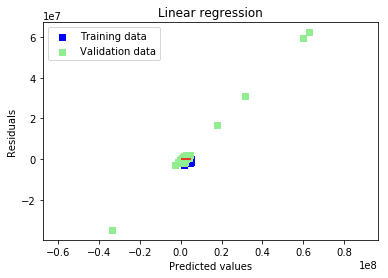

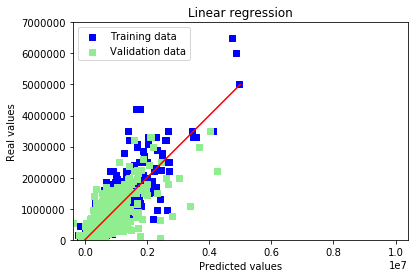

In [301]:
def plot_(y_train,y_train_pred,y_test,y_test_pred, valor):
    plt.scatter((y_train_pred), (y_train_pred - y_train), c = "blue", marker = "s", label = "Training data")
    plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
    plt.title("Linear regression")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc = "upper left")
    plt.axis('equal')
   
    plt.hlines(y = 0, xmin = 0, xmax = valor, color = "red")
    plt.show()

    # Plot predictions
    plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
    plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
    plt.title("Linear regression")
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.axis('equal')
    plt.xlim(0.1,10000000 )
    plt.ylim(0.1,7000000 )
    plt.legend(loc = "upper left")
    plt.plot([0, valor], [0, valor], c = "red")
    plt.show()




y_train_total = np.array([])
y_train_pred_total =np.array([])
y_test_total = np.array([])
y_test_pred_total = np.array([])

df= pd.read_csv('../tp1/data_filled_ready_to_train.csv',encoding='UTF-8')


places = df.place_name.drop_duplicates(keep='first')
for place in range(0,200):
    
    dff = df.loc[df.place_name == place,:]
    train = dff.loc[:,columns]
    y =dff.loc[:,['price_aprox_usd']]

    X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)
    
    if(X_train.shape[0] == 0 or X_test.shape[0] == 0 ):
        continue
    
    y_train_total  = np.append(y_train_total,y_train)
    y_test_total  = np.append(y_test_total,y_test)
    
    

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    
    y_train_pred_total  =np.append(y_train_pred_total,y_train_pred)
    y_test_pred_total  = np.append(y_test_pred_total,y_test_pred)
    
print y_train_total.shape[0] +y_test_total.shape[0]
print df.shape[0]
plot_(y_train_total,y_train_pred_total,y_test_total,y_test_pred_total,5000000)

2592
78657


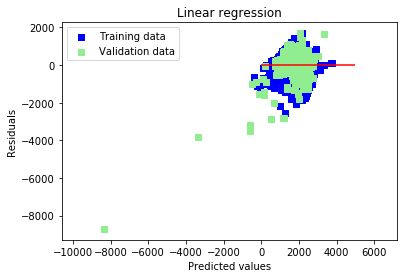

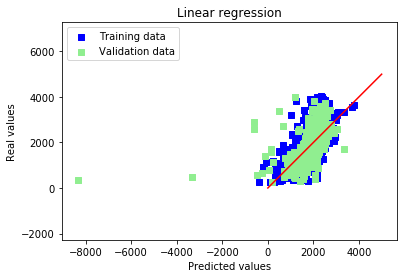

In [293]:
def plot_(y_train,y_train_pred,y_test,y_test_pred, valor):
    plt.scatter((y_train_pred), (y_train_pred - y_train), c = "blue", marker = "s", label = "Training data")
    plt.scatter(y_test_pred, y_test_pred - y_test, c = "lightgreen", marker = "s", label = "Validation data")
    plt.title("Linear regression")
    plt.xlabel("Predicted values")
    plt.ylabel("Residuals")
    plt.legend(loc = "upper left")
    plt.axis('equal')
    plt.hlines(y = 0, xmin = 0, xmax = valor, color = "red")
    plt.show()

    # Plot predictions
    plt.scatter(y_train_pred, y_train, c = "blue", marker = "s", label = "Training data")
    plt.scatter(y_test_pred, y_test, c = "lightgreen", marker = "s", label = "Validation data")
    plt.title("Linear regression")
    plt.xlabel("Predicted values")
    plt.ylabel("Real values")
    plt.axis('equal')
    plt.legend(loc = "upper left")
    plt.plot([0, valor], [0, valor], c = "red")
    plt.show()



y_train_total = np.array([])
y_train_pred_total =np.array([])
y_test_total = np.array([])
y_test_pred_total = np.array([])

df= pd.read_csv('../tp1/data_filled_ready_to_train.csv',encoding='UTF-8')


places = df.place_name.drop_duplicates(keep='first')
for place in range(3,15):
    
    dff = df.loc[df.place_name == place,:]
    train = dff.loc[:,columns]
    y =dff.loc[:,['price_usd_per_m2']]

    X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)
    
    if(X_train.shape[0] == 0 or X_test.shape[0] == 0 ):
        continue
    
    y_train_total  = np.append(y_train_total,y_train)
    y_test_total  = np.append(y_test_total,y_test)
    
    

    lr = LinearRegression()
    lr.fit(X_train, y_train)

    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    
    y_train_pred_total  =np.append(y_train_pred_total,y_train_pred)
    y_test_pred_total  = np.append(y_test_pred_total,y_test_pred)
    
print y_train_total.shape[0] +y_test_total.shape[0]
print df.shape[0]
plot_(y_train_total,y_train_pred_total,y_test_total,y_test_pred_total,5000)



# barrio y tipo de propiedad

X_train: (74, 9)
y_train: (74,)
X_test: (32, 9)
y_test: (32,)
('RMSE on Training set :', 67806.841873528261)
('RMSE on Test set :', 78553.631047043324)


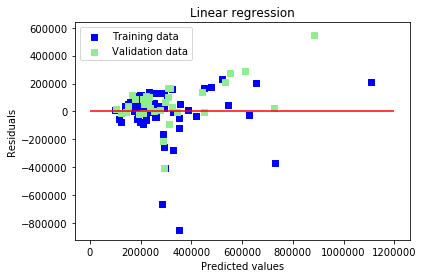

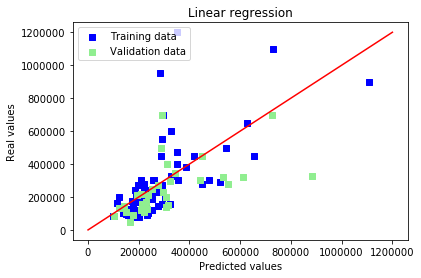

In [182]:
df_barrio = df.loc[df.place_name== 150,:]
df_barrio_depto = df_barrio.loc[df_barrio.property_type == 1,:]
analize_regrssion(df_barrio_depto, columns,1200000)

concluimos que lo mejor es por zona y tipo de propiedad

# usando otras feautures

('Best alpha :', 60.0)
Try again for more precision with alphas centered around 60.0
('Best alpha :', 84.0)
('Ridge RMSE on Training set :', 67747.219181571156)
('Ridge RMSE on Test set :', 78507.309305006842)


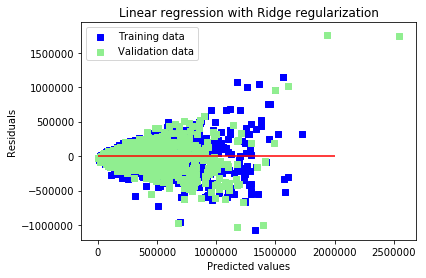

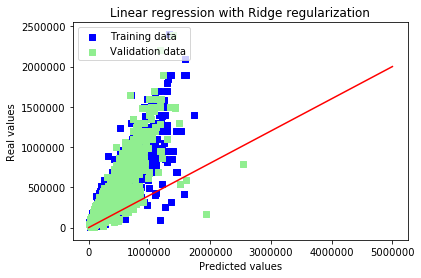

Ridge picked 8 features and eliminated the other 1 features


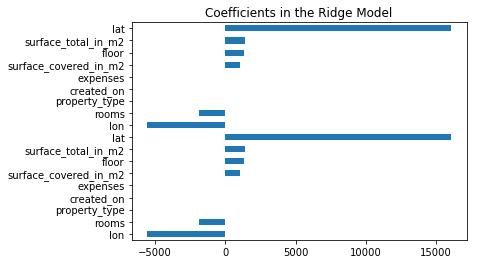

In [183]:
df_capfed = df.loc[df.state_name== 3,:]
df_capfed_depto = df_capfed.loc[df_capfed.property_type == 1,:]

train = df_capfed_depto.loc[:,columns]
y =df_capfed_depto.price_aprox_usd
X_train, X_test, y_train, y_test = train_test_split(train, y, test_size = 0.3, random_state = 0)



# 2* Ridge
ridge = RidgeCV(alphas = [0.001, 0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 0, xmax = 2000000, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([0, 5000000], [0, 2000000], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()


X_train: (19711, 2)
y_train: (19711,)
X_test: (8448, 2)
y_test: (8448,)
('RMSE on Training set :', 67806.841873528261)
('RMSE on Test set :', 78553.631047043324)


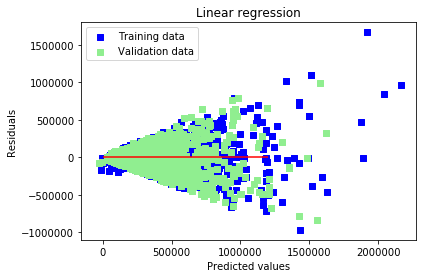

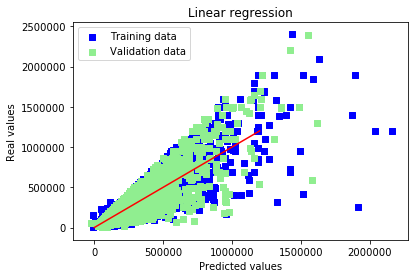

In [184]:
df_capfed = df.loc[df.state_name== 3,:]
df_capfed_depto = df_capfed.loc[df_capfed.property_type == 1,:]
analize_regrssion(df_capfed_depto,['lat','surface_total_in_m2'],1200000)

X_train: (19711, 4)
y_train: (19711,)
X_test: (8448, 4)
y_test: (8448,)
('RMSE on Training set :', 67806.841873528261)
('RMSE on Test set :', 78553.631047043324)


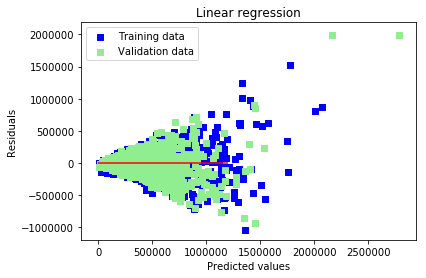

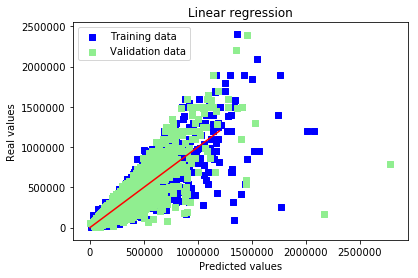

In [188]:
df_capfed = df.loc[df.state_name== 3,:]
df_capfed_depto = df_capfed.loc[df_capfed.property_type == 1,:]
analize_regrssion(df_capfed_depto,['lat','expenses','surface_total_in_m2','place_name'],1200000)